# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset 

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

In [4]:
#checking the shape of the dataset
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [5]:
#checking the column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#Checking the column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#Checking the dtypes of the dataset
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We have 2 int64 type data,2 float64 type data and 3 object type data.

Checking for unique and ununique values in the object type data.

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
print(df['sex'].nunique())
print(df['smoker'].nunique())
print(df['region'].nunique())

2
2
4


In [12]:
#Checking the nunique values in the all columns
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

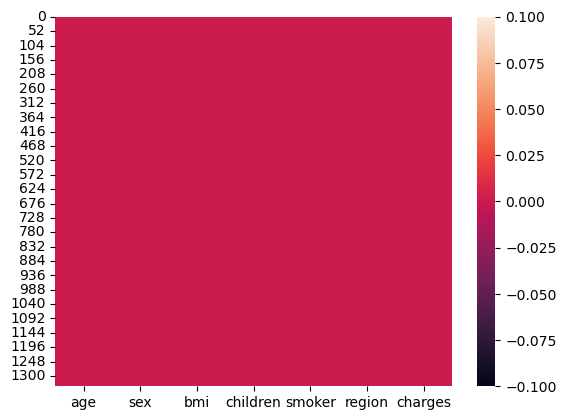

In [13]:
#Checking for null values through heatmap and info function
df.info()

sns.heatmap(df.isnull())

We can see from the above there are no null values present in the dataset

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
    
1.The mean and 50%(median)are almost the same for age,bmi and children.For charges column the mean is greater than the median.Which shows that there is some skewness,but it is or target variable.Hence we will not remove its skewness.

2.The 75% and max values has some difference in the bmi colum indicates that there are some outlier present in it.

3.The min charge is 1121 and Max Charge is 63770 

# Data Visualization

Univariate Analysis

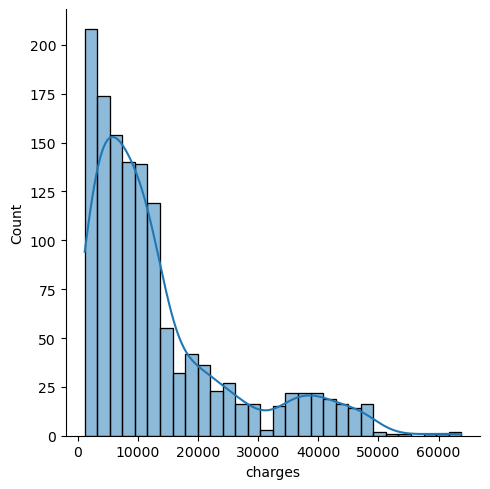

In [15]:
sns.displot(df['charges'],kde=True)

As we can see above the charges are right tail shewed.

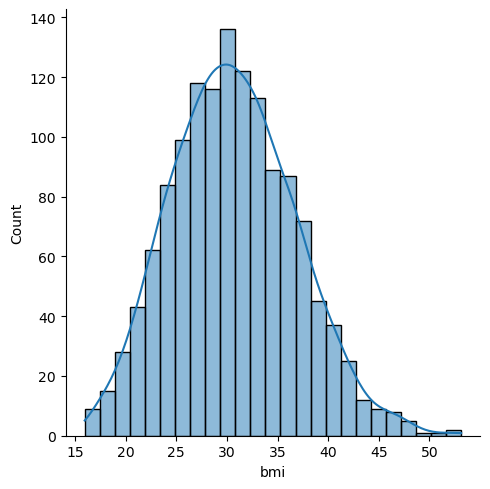

In [16]:
sns.displot(df['bmi'],kde=True)

As we see above there is no skewness in the bmi column.

male      676
female    662
Name: sex, dtype: int64


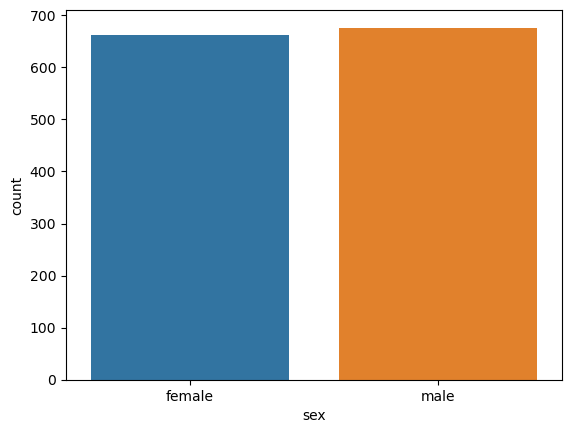

In [17]:
sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

The count of the Male and Female present in the data is almost same.

no     1064
yes     274
Name: smoker, dtype: int64


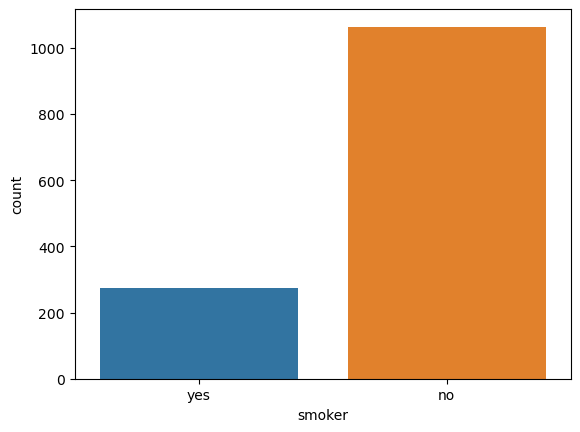

In [18]:
sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

The number of smokers are less

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


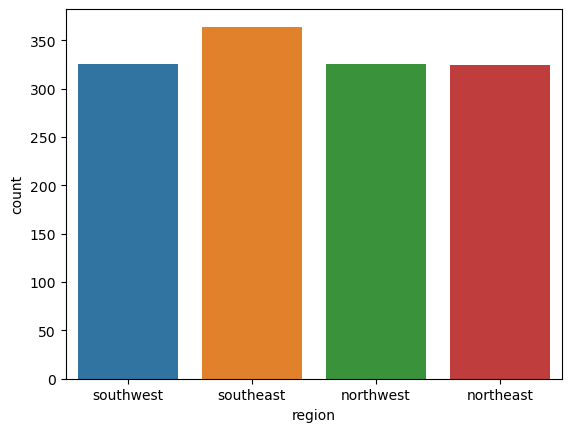

In [19]:
sns.countplot(x='region',data=df)
print(df['region'].value_counts())

The people insured in southeast region are more when compared to other three regions.

# Bivariate Analysis

Lets see how our target variable is affected by the independent varaiables.

<AxesSubplot:xlabel='age', ylabel='charges'>

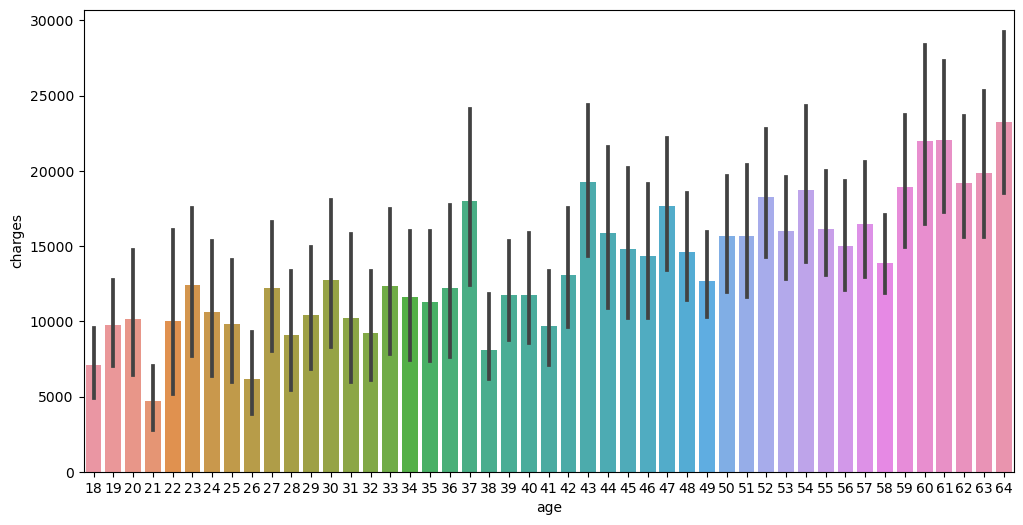

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['age'], y=df['charges'],data=df)

As we can see as the age increases the medical charges increases

<AxesSubplot:xlabel='children', ylabel='charges'>

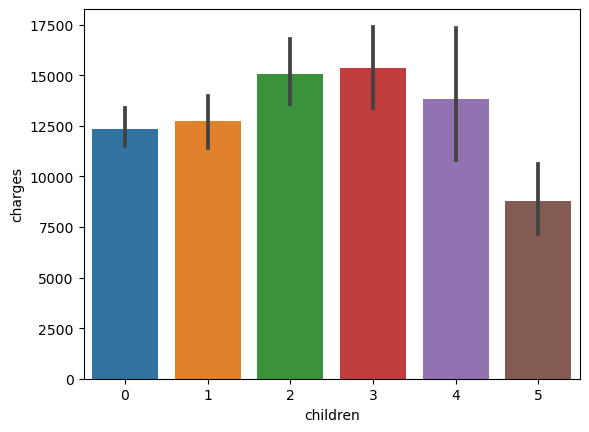

In [21]:
sns.barplot(data=df, x=df['children'],y=df['charges'])

We can see how the charges are based on number of children

# Multivariate Analysis

<Figure size 2000x1500 with 0 Axes>

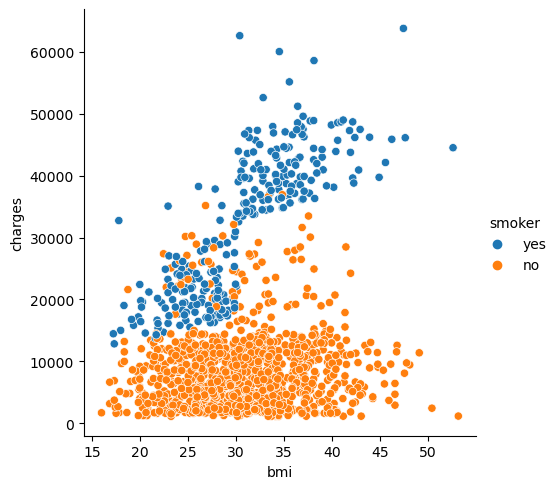

In [22]:
plt.figure(figsize=(20,15))
sns.relplot(x='bmi',y='charges',hue='smoker',data=df)

As we can see the charges are quite high for smokers irrespective of the bmi values.

<AxesSubplot:xlabel='region', ylabel='charges'>

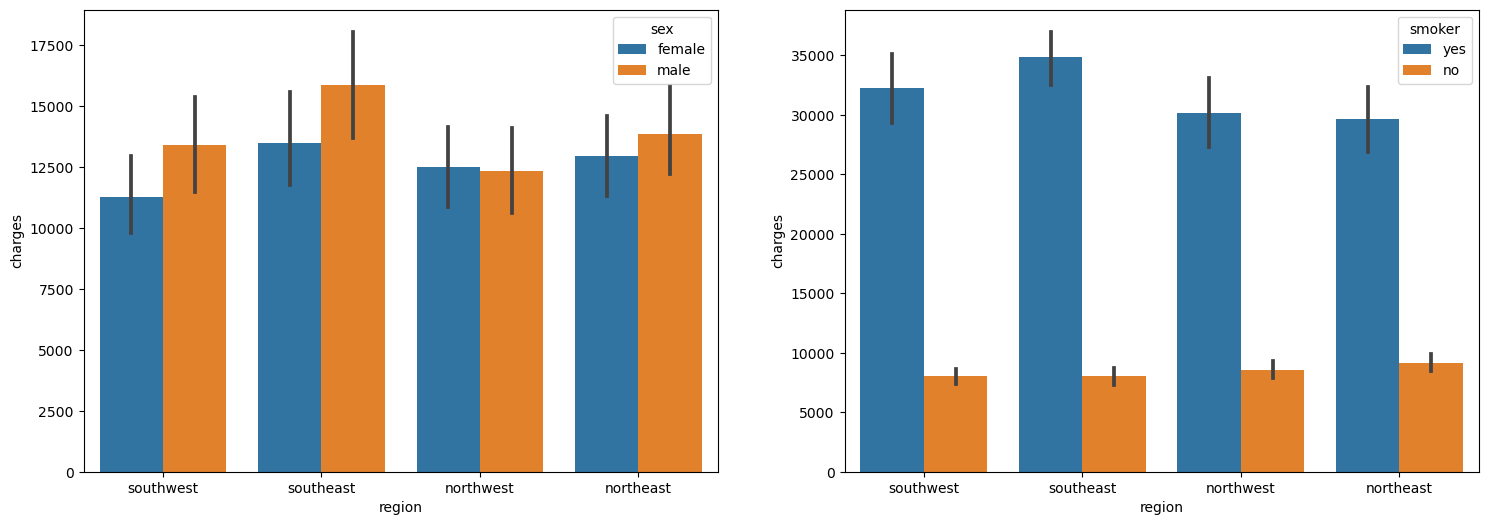

In [23]:
plt.subplots(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(x=df['region'],y=df['charges'],hue='sex', data=df)

plt.subplot(1,2,2)
sns.barplot(x=df['region'],y=df['charges'],hue='smoker', data=df)

1.Based on each region,if we look at it based on gender,on average,men have higher hospital charges than women.

2.When we look at the smoking,then the charges are high.This also happens in reality that the smokers have high chances of diseases compared to the non smokers.

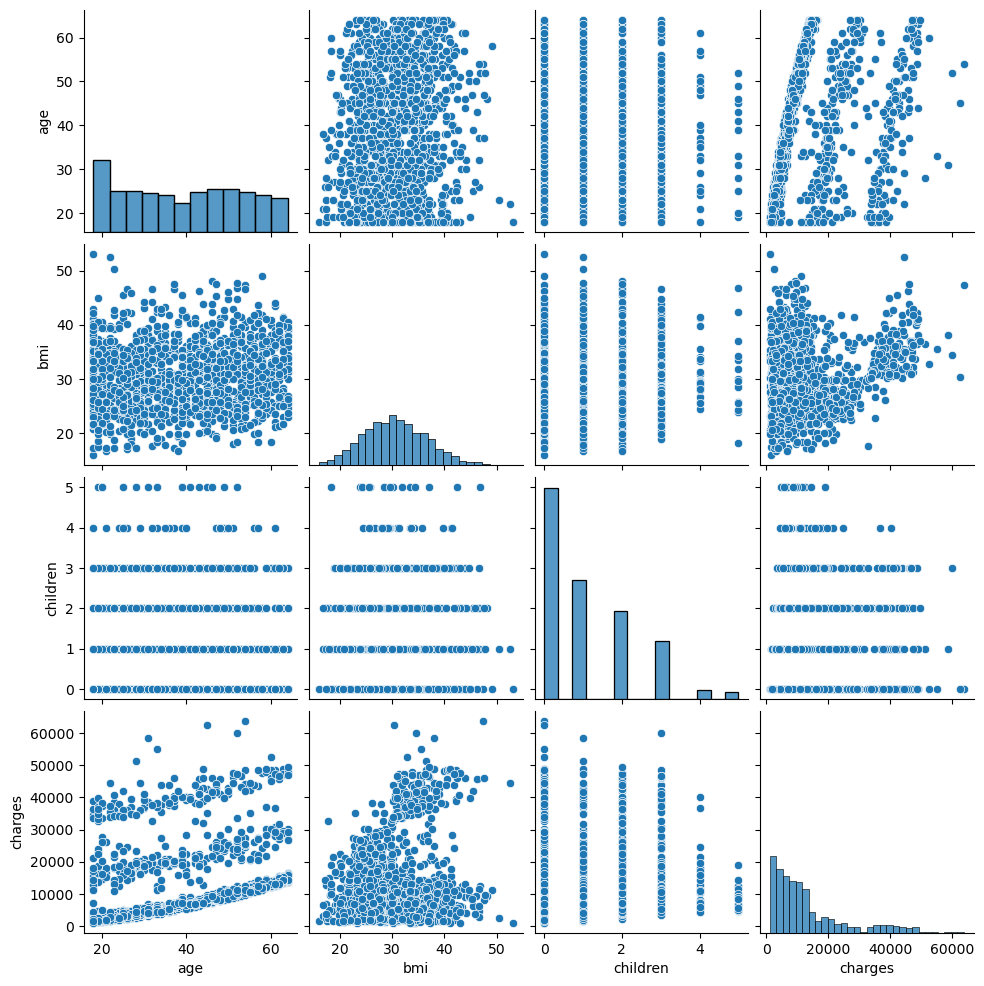

In [24]:
sns.pairplot(df)
plt.show()

# Encoding the Categorical columns to Numerical columns

In [25]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df    

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


Using the Ordinal Encoder,i have changed the categorical columns to numerical columns.

# Checking for outlier

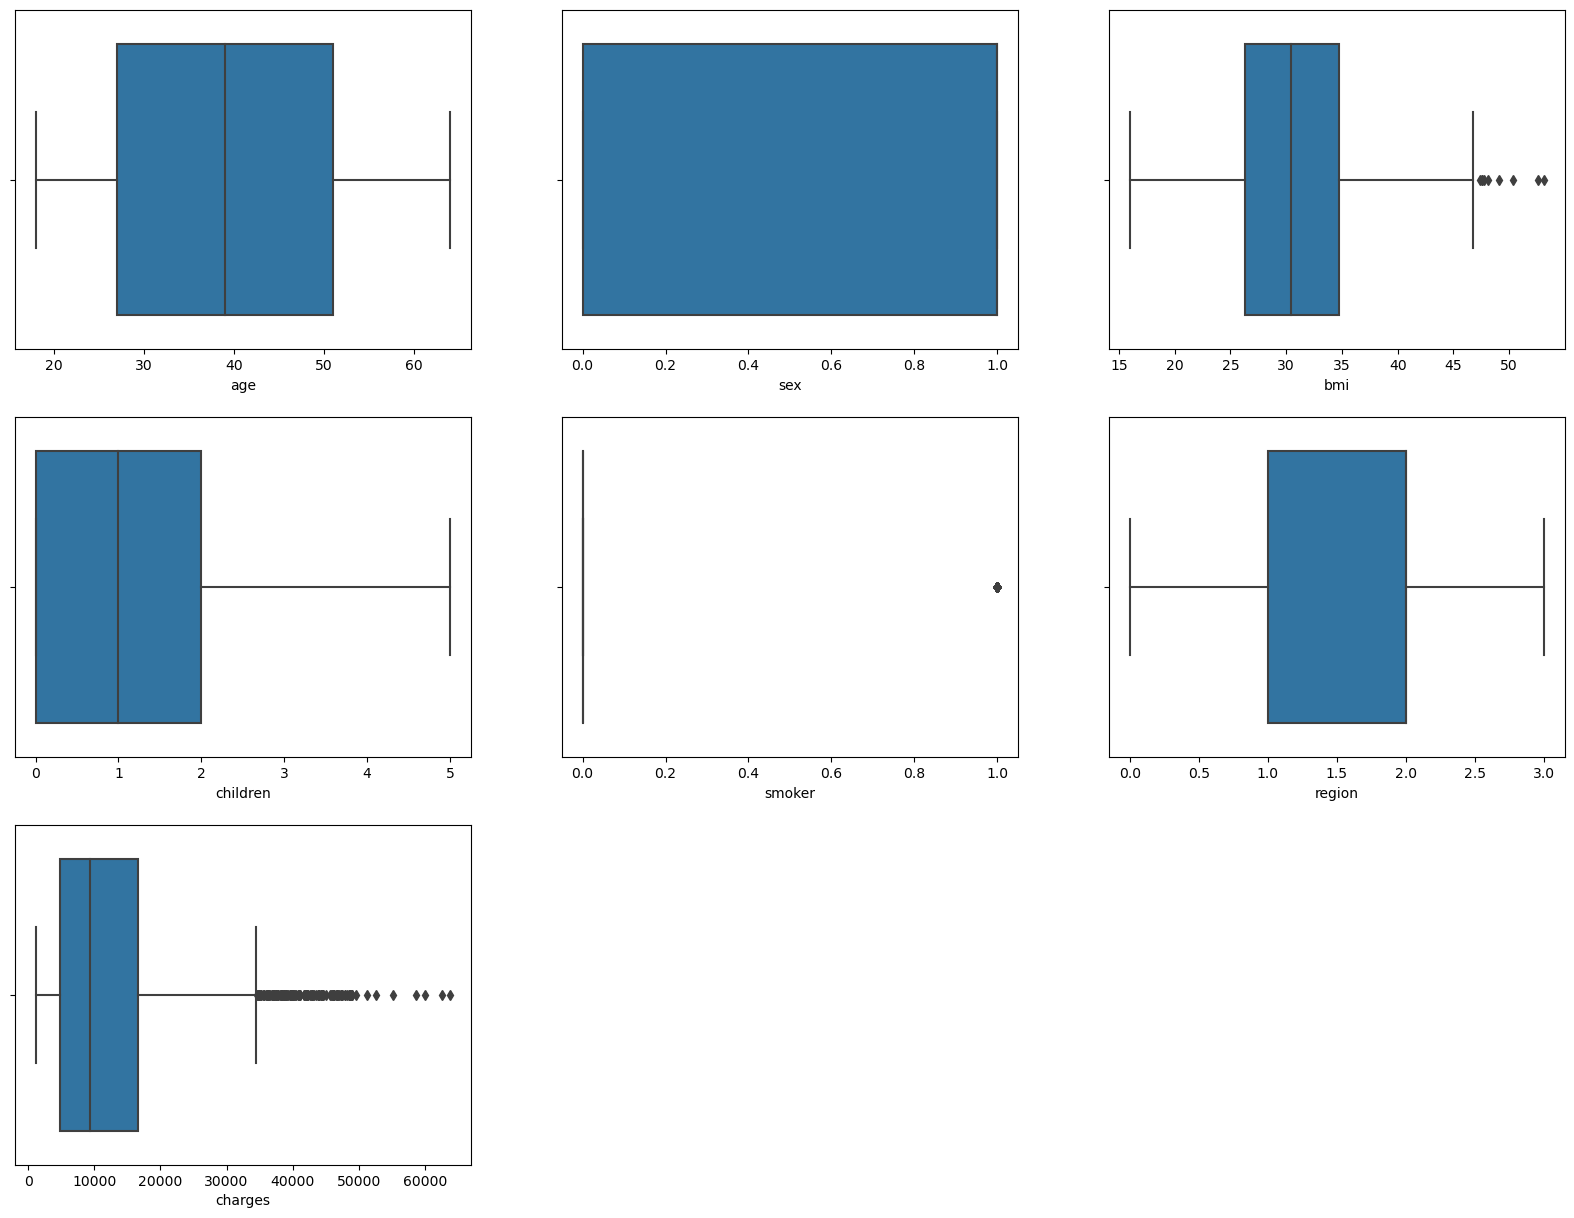

In [26]:
plt.figure(figsize=(20,15))
for i in enumerate(df.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

Since charges is the target variables we will not be removing the outliers from it.But bmi has some outliers,so we will remove outliers from it.

# Removing Outliers

zscore method

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df['bmi']))
z

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [28]:
threshold=3
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64),)


In [29]:
z.iloc[1047]

3.595297768208803

In [30]:
df1=df[(z<3)]
print(df.shape)
print(df1.shape)

(1338, 7)
(1334, 7)


In [31]:
#Data loss percentage using zscore method
a=((1338-1334)/1338)*100
a

0.29895366218236175

In [32]:
df=df1
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [33]:
df.reset_index(drop=True,inplace=True)

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1329,50,1.0,30.970,3,0.0,1.0,10600.54830
1330,18,0.0,31.920,0,0.0,0.0,2205.98080
1331,18,0.0,36.850,0,0.0,2.0,1629.83350
1332,21,0.0,25.800,0,0.0,3.0,2007.94500


Checking for skewness

In [35]:
df.skew()

age         0.053603
sex        -0.015010
bmi         0.205622
children    0.935415
smoker      1.465804
region     -0.034385
charges     1.517663
dtype: float64

As we see the values are low in all columns except for charges.But the Charges is the target variable,so we will not be removing skewness from it.

# Correlation Between variables

In [36]:
dfcor=df.corr()
dfcor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.301360
sex,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.057165
bmi,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.200799
children,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.067569
smoker,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.786536
region,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.006404
charges,0.301360,0.057165,0.200799,0.067569,0.786536,-0.006404,1.000000


<AxesSubplot:>

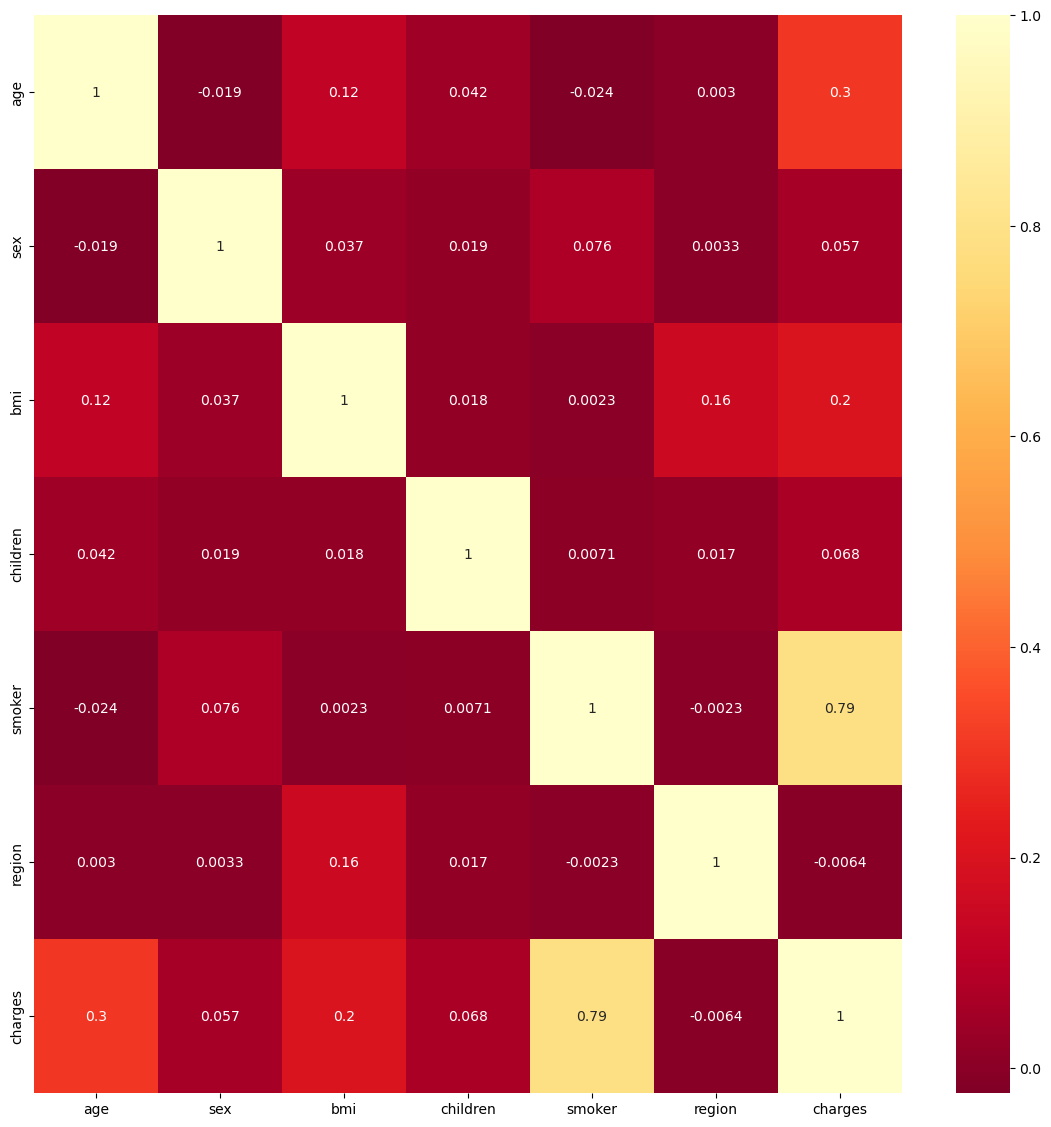

In [37]:
plt.figure(figsize=(14,14))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observation:

1.The smoker is highly correlated to the charges.

2.Age is less correlated to the charges.

3.Bmi is very less correlated to the charges.

# Checking Multicolinearity

splitting the data

In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [40]:
vif_calc()

   VIF FACTOR  features
0    7.670204       age
1    1.990736       sex
2   10.499577       bmi
3    1.805040  children
4    1.256628    smoker
5    2.915776    region


The bmi vif value and age vif value is more but we will loose the data if we remove it.So not removing.

Feature Scaling using Min-Max Scaler

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1329,50,1.0,30.970,3,0.0,1.0,10600.54830
1330,18,0.0,31.920,0,0.0,0.0,2205.98080
1331,18,0.0,36.850,0,0.0,2.0,1629.83350
1332,21,0.0,25.800,0,0.0,3.0,2007.94500


In [42]:
num=df[['age','bmi']]
num

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1329,50,30.970
1330,18,31.920
1331,18,36.850
1332,21,25.800


Selecting only numerical columns

In [43]:
from sklearn.preprocessing import MinMaxScaler

st=MinMaxScaler()
num=st.fit_transform(num)
num

array([[0.02173913, 0.37184678],
       [0.        , 0.55465587],
       [0.2173913 , 0.5306758 ],
       ...,
       [0.        , 0.65057614],
       [0.06521739, 0.30644659],
       [0.93478261, 0.40828402]])

In [44]:
num=pd.DataFrame(data=num)
num.columns=['age','bmi']
num

,age,bmi
0,0.021739,0.371847
1,0.000000,0.554656
2,0.217391,0.530676
3,0.326087,0.210059
4,0.304348,0.402367
...,...,...
1329,0.695652,0.467456
1330,0.000000,0.497041
1331,0.000000,0.650576
1332,0.065217,0.306447


In [45]:
#replacing the scaled columns with the dataset
df['age']=num['age']
df['bmi']=num['bmi']
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.371847,0,1.0,3.0,16884.92400
1,0.000000,1.0,0.554656,1,0.0,2.0,1725.55230
2,0.217391,1.0,0.530676,3,0.0,2.0,4449.46200
3,0.326087,1.0,0.210059,0,0.0,1.0,21984.47061
4,0.304348,1.0,0.402367,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1329,0.695652,1.0,0.467456,3,0.0,1.0,10600.54830
1330,0.000000,0.0,0.497041,0,0.0,0.0,2205.98080
1331,0.000000,0.0,0.650576,0,0.0,2.0,1629.83350
1332,0.065217,0.0,0.306447,0,0.0,3.0,2007.94500


# Modeling

splitting the data

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

Creating train test split and finding the best random_state

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," At random state ",maxRS)

Maximum r2 score is  0.798036034590452  At random state  179


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 1.LinearRegression

In [51]:
LRR=LinearRegression()
LRR.fit(x_train,y_train)
predLRR=LRR.predict(x_test)
pred_train=LRR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predLRR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predLRR))
print("Mean squared error: ",mean_squared_error(y_test, predLRR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predLRR)))



R2 Score:  0.798036034590452
R2 score on training data:  72.79584787487103
Mean absolute error:  4009.042544839689
Mean squared error:  30651251.461297404
Root Mean squared error:  5536.357237507114


# 2.RandomForestRegressor

In [52]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predRFR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predRFR))
print("Mean squared error: ",mean_squared_error(y_test, predRFR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predRFR)))

R2 Score:  0.8691663894529207
R2 score on training data:  97.28712726121262
Mean absolute error:  2642.984690954789
Mean squared error:  19856086.150496993
Root Mean squared error:  4456.016848093934


# 3.GradientBoostingRegressor

In [53]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predGBR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predGBR))
print("Mean squared error: ",mean_squared_error(y_test, predGBR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predGBR)))

R2 Score:  0.8976757663844169
R2 score on training data:  89.81908160278628
Mean absolute error:  2359.2945323592085
Mean squared error:  15529333.704533737
Root Mean squared error:  3940.7275603032667


# 4.DecisionTreeRegressor

In [54]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predDTR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predDTR))
print("Mean squared error: ",mean_squared_error(y_test, predDTR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predDTR)))


R2 Score:  0.7620014463722417
R2 score on training data:  99.86325220584284
Mean absolute error:  2771.6058597132164
Mean squared error:  36120074.68697
Root Mean squared error:  6009.997894090314


# 5.KNeighborsRegressor

In [55]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
predKNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predKNR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predKNR))
print("Mean squared error: ",mean_squared_error(y_test, predKNR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predKNR)))

R2 Score:  0.7346031767183459
R2 score on training data:  78.82063201876583
Mean absolute error:  4013.981909949127
Mean squared error:  40278198.89028044
Root Mean squared error:  6346.510765001541


# 6.SupportVectorRegressor

In [56]:
SVRR=SVR(kernel='poly')
SVRR.fit(x_train,y_train)
predSVRR=SVRR.predict(x_test)
pred_train=SVRR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predSVRR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predSVRR))
print("Mean squared error: ",mean_squared_error(y_test, predSVRR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predSVRR)))

R2 Score:  -0.07742064726385856
R2 score on training data:  -9.195558247820191
Mean absolute error:  8257.441128669783
Mean squared error:  163515759.46684748
Root Mean squared error:  12787.328081614527


SVR is working badly on the dataset as the r2 score is negative with even different kernels

# 7.Lasso

In [57]:
LAR=Lasso()
LAR.fit(x_train,y_train)
predLAR=LAR.predict(x_test)
pred_train=LAR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predLAR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predLAR))
print("Mean squared error: ",mean_squared_error(y_test, predLAR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predLAR)))

R2 Score:  0.7980428005310878
R2 score on training data:  72.79581210650323
Mean absolute error:  4007.9092445413594
Mean squared error:  30650224.621943288
Root Mean squared error:  5536.264500720977


# 8.Ridge

In [58]:
RR=Ridge()
RR.fit(x_train,y_train)
predRR=RR.predict(x_test)
pred_train=RR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predRR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predRR))
print("Mean squared error: ",mean_squared_error(y_test, predRR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predRR)))

R2 Score:  0.7977098729489579
R2 score on training data:  72.78938829253705
Mean absolute error:  4007.557335930211
Mean squared error:  30700751.690064427
Root Mean squared error:  5540.8259032444275


# 9.ElasticNet

In [59]:
ENR=ElasticNet()
ENR.fit(x_train,y_train)
predENR=ENR.predict(x_test)
pred_train=ENR.predict(x_train)
print("R2 Score: ",r2_score(y_test,predENR))
print("R2 score on training data: ",r2_score(y_train,pred_train)*100)
print("Mean absolute error: ",mean_absolute_error(y_test, predENR))
print("Mean squared error: ",mean_squared_error(y_test, predENR))
print("Root Mean squared error: ",np.sqrt(mean_squared_error(y_test, predENR)))

R2 Score:  0.3045986791703258
R2 score on training data:  28.920412751143953
Mean absolute error:  7627.04766488269
Mean squared error:  105538236.52672757
Root Mean squared error:  10273.180448465197


# Cross Validation to avoid overfitting and underfitting

In [60]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(LRR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and CV score is - ", (r2_score(y_test,predLRR)-score1.mean())*100)
s1=(r2_score(y_test,predLRR)-score1.mean())*100
s11=(score1.mean())*100

[0.76244722 0.7081777  0.77517256 0.73369035 0.75586661]
0.7470708876548772
Difference between R2 score and CV score is -  5.096514693557486


In [61]:
score2=cross_val_score(RFR,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predRFR)-score2.mean())*100)
s2=(r2_score(y_test,predRFR)-score2.mean())*100
s22=(score2.mean())*100

[0.85357688 0.77650731 0.8618154  0.83069251 0.85439765]
0.8353979497282754
Difference between R2 score and CV score is -  3.376843972464527


In [62]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predGBR)-score3.mean())*100)
s3=(r2_score(y_test,predGBR)-score3.mean())*100
s33=(score3.mean())*100

[0.87325976 0.79751305 0.8912873  0.85014438 0.86073464]
0.854587826683883
Difference between R2 score and CV score is -  4.308793970053393


In [63]:
score4=cross_val_score(DTR,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predDTR)-score4.mean())*100)
s4=(r2_score(y_test,predDTR)-score4.mean())*100
s44=(score4.mean())*100

[0.75331665 0.63834208 0.7101408  0.71535101 0.67851034]
0.6991321759483735
Difference between R2 score and CV score is -  6.286927042386814


In [64]:
score5=cross_val_score(KNR,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predKNR)-score5.mean())*100)
s5=(r2_score(y_test,predKNR)-score5.mean())*100
s55=(score5.mean())*100

[0.70446826 0.69286447 0.72029606 0.70648868 0.71371614]
0.7075667230059922
Difference between R2 score and CV score is -  2.7036453712353636


In [65]:
score6=cross_val_score(SVRR,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predSVRR)-score6.mean())*100)
s6=(r2_score(y_test,predSVRR)-score6.mean())*100
s66=(score6.mean())*100

[-0.09688575 -0.09737406 -0.06215334 -0.08992485 -0.0893999 ]
-0.08714757954332963
Difference between R2 score and CV score is -  0.9726932279471079


In [66]:
score7=cross_val_score(LAR,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predLAR)-score7.mean())*100)
s7=(r2_score(y_test,predLAR)-score7.mean())*100
s77=(score7.mean())*100

[0.76243946 0.70826648 0.7751361  0.73369385 0.75587385]
0.7470819460341585
Difference between R2 score and CV score is -  5.096085449692933


In [67]:
score8=cross_val_score(RR,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predRR)-score8.mean())*100)
s8=(r2_score(y_test,predRR)-score8.mean())*100
s88=(score8.mean())*100

[0.76225962 0.70913049 0.77435399 0.7339737  0.7556746 ]
0.7470784785031941
Difference between R2 score and CV score is -  5.063139444576381


In [68]:
score9=cross_val_score(ENR,x,y)
print(score9)
print(score9.mean())
print('Difference between R2 score and CV score is - ', (r2_score(y_test,predENR)-score9.mean())*100)
s9=(r2_score(y_test,predENR)-score9.mean())*100
s99=(score9.mean())*100

[0.30017931 0.3060473  0.29441141 0.30030315 0.30252562]
0.3006933578600962
Difference between R2 score and CV score is -  0.39053213102295814


In [69]:
diction={'Models':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','SVR','Lasso','Ridge','ElasticNet'],'Cv mean':[s11,s22,s33,s44,s55,s66,s77,s88,s99],'difference btw r2 and cv':[s1,s2,s3,s4,s5,s6,s7,s8,s9]}
dcvmrm=pd.DataFrame(diction)
dcvmrm

,Models,Cv mean,difference btw r2 and cv
0,LinearRegression,74.707089,5.096515
1,RandomForestRegressor,83.539795,3.376844
2,GradientBoostingRegressor,85.458783,4.308794
3,DecisionTreeRegressor,69.913218,6.286927
4,KNeighborsRegressor,70.756672,2.703645
5,SVR,-8.714758,0.972693
6,Lasso,74.708195,5.096085
7,Ridge,74.707848,5.063139
8,ElasticNet,30.069336,0.390532


Comparing the Cross validation and difference between r2 and cv mean,there are 2 best models

1.Random forest Regressor
2.Gradient boosting Regressor

<AxesSubplot:ylabel='Cv mean'>

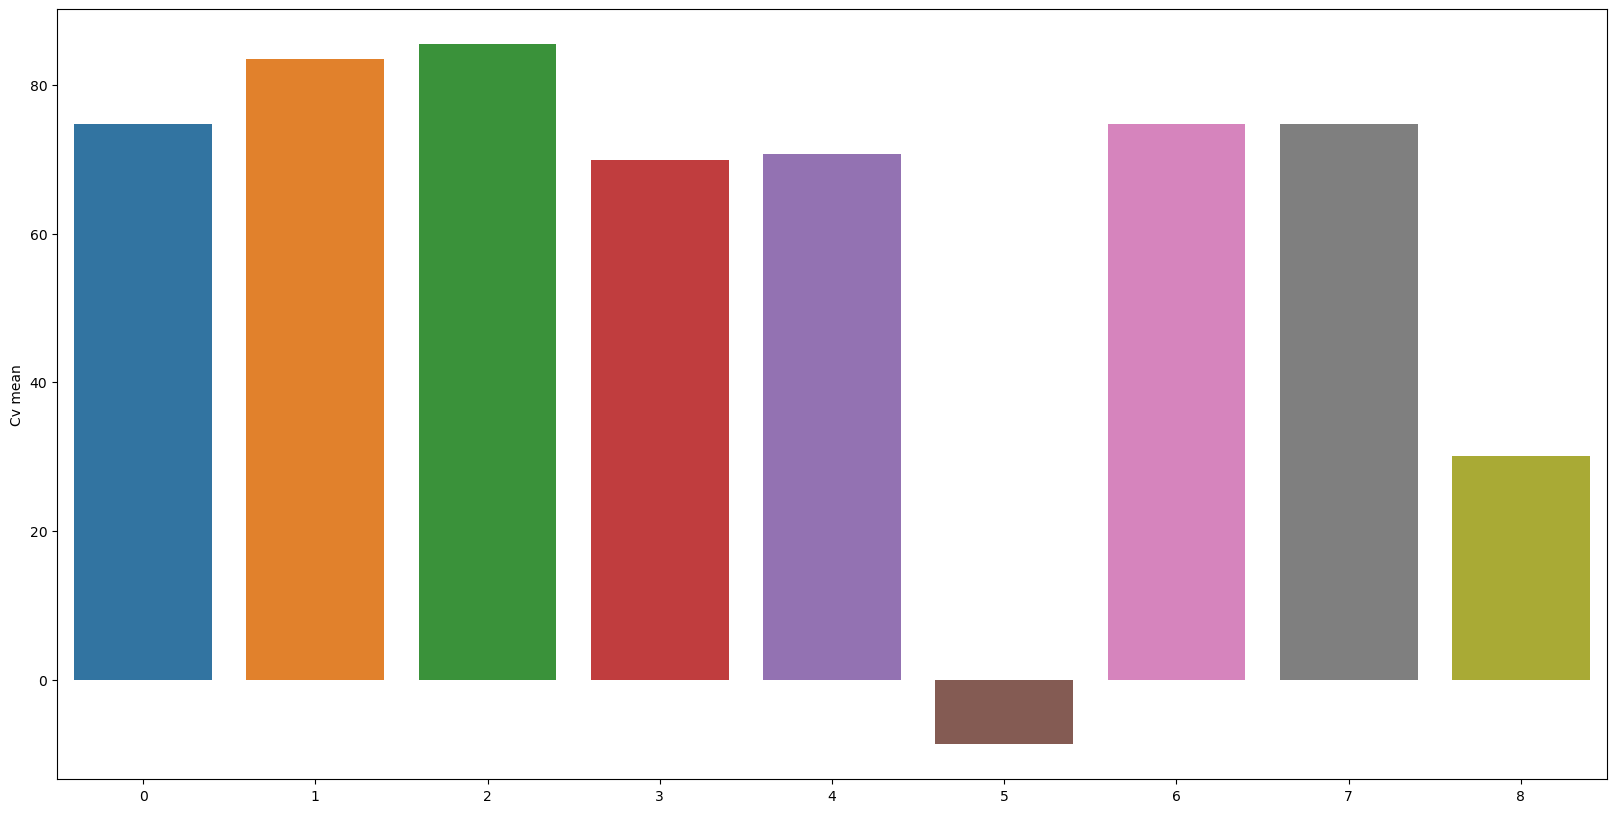

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(y=dcvmrm['Cv mean'],x=dcvmrm.index,data=dcvmrm)

<AxesSubplot:ylabel='difference btw r2 and cv'>

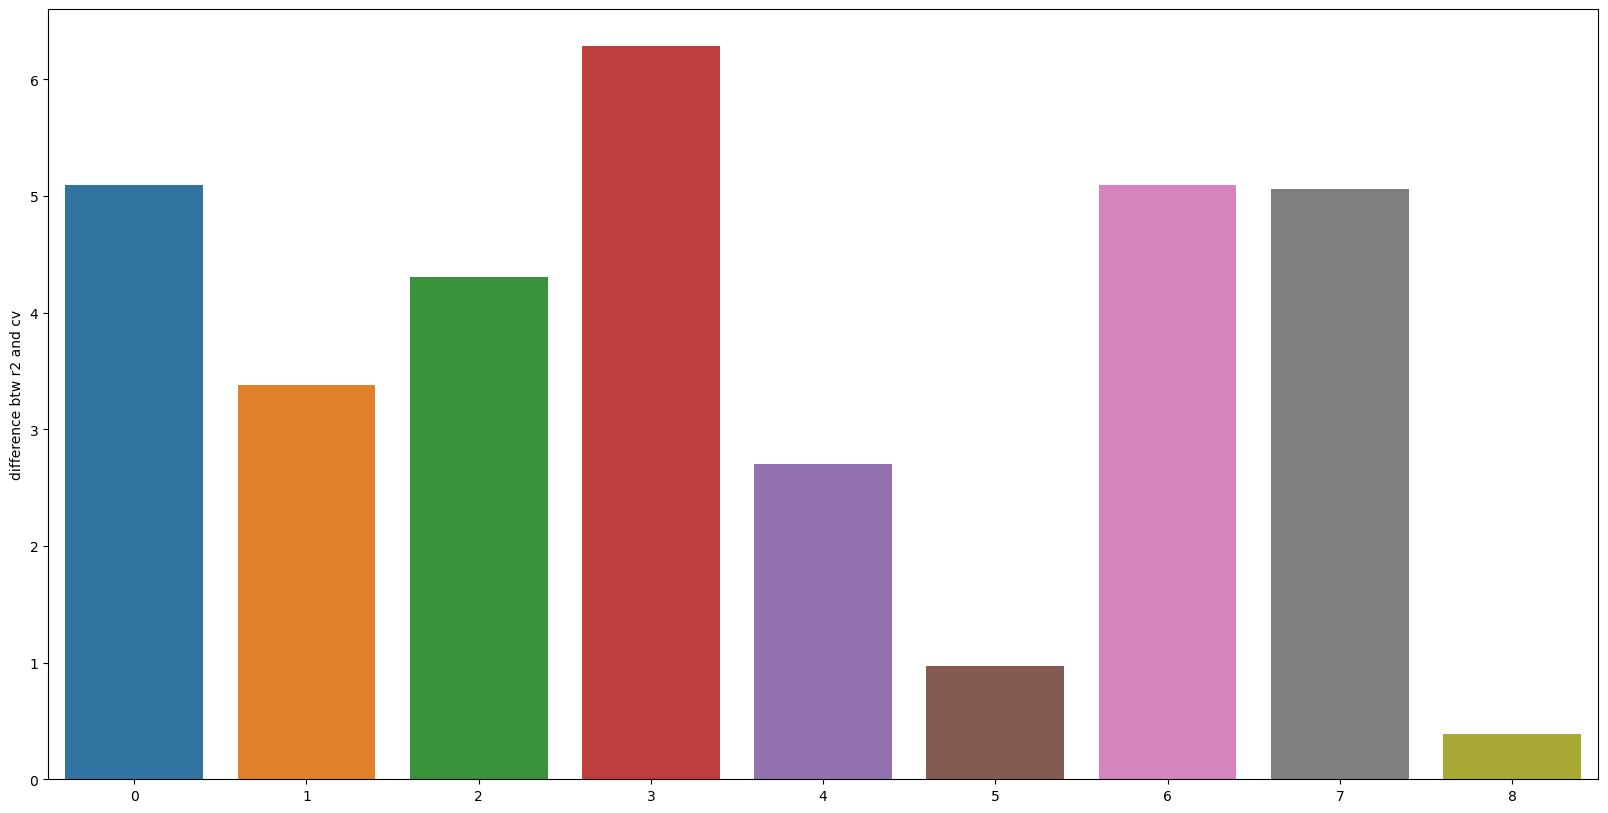

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(y=dcvmrm['difference btw r2 and cv'],x=dcvmrm.index,data=dcvmrm)

The above is the graphical representation

# Hyper Parameter Tunning

Random Forest Regressor

In [72]:
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap':[True, False],
 'max_depth': [10,30, 50, 70, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 350, 400, 500]}
GCV=GridSearchCV(RFR,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 30, 50, 70, 90, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 350, 400, 500]})

In [73]:
best_parameters=GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.8295565166492913


In [75]:
Final_model1=RandomForestRegressor(bootstrap=True, max_depth=50, max_features='auto', min_samples_leaf=4, min_samples_split=10,n_estimators=350)
Final_model1.fit(x_train,y_train)
pred1 = Final_model1.predict(x_test)
print("R2 score: ",r2_score(y_test,pred1))
print('Mean absolute error: ',mean_absolute_error(y_test, pred1))
print('Mean squared error: ',mean_squared_error(y_test, pred1))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, pred1)))

R2 score:  0.8919502879805218
Mean absolute error:  2487.2940251686664
Mean squared error:  16398266.327925965
Root Mean squared error:  4049.477290703822


# Gradient Boosting Regressor

In [82]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,500,1000],
            'learning_rate':[.001,0.01,.1],
            'max_depth':[1,2,4],
            'subsample': [.5,.75,1],
            'random_state':[1,2]}
GCV=GridSearchCV(GBR,parameters)
GCV.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [1, 2], 'subsample': [0.5, 0.75, 1]})

In [83]:
best_parameters=GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'random_state': 2, 'subsample': 0.75}
0.8320817566975542


In [85]:
Final_model2=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=2, subsample=0.75, random_state = 2)
Final_model2.fit(x_train,y_train)
pred2 = Final_model2.predict(x_test)
print("R2 score: ",r2_score(y_test,pred2))
print('Mean absolute error: ',mean_absolute_error(y_test, pred2))
print('Mean squared error: ',mean_squared_error(y_test, pred2))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test, pred2)))

R2 score:  0.9022213593418984
Mean absolute error:  2321.5081803020657
Mean squared error:  14839467.507373592
Root Mean squared error:  3852.2029421324096


# Saving the Model

In [86]:
import pickle
filename= 'Insurancecost.pkl'
pickle.dump(Final_model2,open(filename,'wb'))

In [87]:
loaded_model=pickle.load(open('Insurancecost.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.22213593418984


In [88]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted"]=prediction
df4["Original"] = a
df4

,Predicted,Original
0,5469.727509,2842.76075
1,6663.978725,5227.98875
2,47910.577163,47896.79135
3,4850.159485,3659.34600
4,11717.442101,9866.30485
...,...,...
396,4101.766168,3180.51010
397,14430.664674,13470.86000
398,41456.864064,41097.16175
399,13770.799754,12094.47800
